# Frame dragging, vorticity and electromagnetic fields in axially symmetric stationary spacetimes by Herrera
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 22, 2022

https://arxiv.org/abs/gr-qc/0602040

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [4]:
f = Function('f')(rho,z)
f

In [5]:
omega = Function('omega')(rho,z)
omega

In [6]:
gamma = Function('gamma')(rho,z)
gamma

In [7]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand(  - f*(dt - omega * dphi)**2 + f**-1 * ( (exp(2*gamma) * ( drho**2 + dz**2) + rho**2 * dphi**2)) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   -f(ρ, z)          0            f(ρ, z)⋅ω(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ               2                  ⎥
⎢f(ρ, z)⋅ω(ρ, z)      0       ─────── - f(ρ, z)⋅ω (ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡   -f(ρ, z)          0            f(ρ, z)⋅ω(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ               2                  ⎥
⎢f(ρ, z)⋅ω(ρ, z)      0       ─────── - f(ρ, z)⋅ω (ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                             ∂              2             
⎢⎢                                                             ──(f(ρ, z))   f (ρ, z)⋅ω(ρ, z
⎢⎢                                                             ∂ρ                           
⎢⎢                    0                                        ─────────── + ───────────────
⎢⎢                                                              2⋅f(ρ, z)                   
⎢⎢                                                                                       2⋅ρ
⎢⎢                                                                                          
⎢⎢∂              2               ∂                                                          
⎢⎢──(f(ρ, z))   f (ρ, z)⋅ω(ρ, z)⋅──(ω(ρ, z))                                                
⎢⎢∂ρ                             ∂ρ                                                         
⎢⎢─────────── + ────────────────────────────                          

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

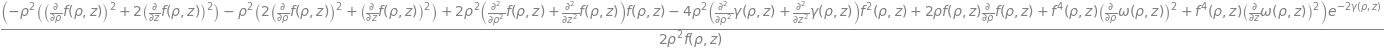

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [23]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

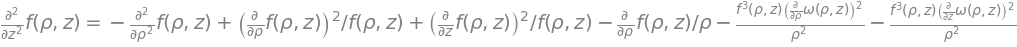

In [31]:
d2fdz2 = Eq(diff(f,z,z), solve( ricciSimplified[0,0].args[2], diff(f,z,z) )[0] ) 
d2fdz2

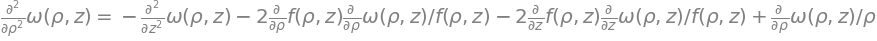

In [34]:
d2omegadrho2 = Eq( diff(omega,rho,rho), solve( ricciSimplified[0,2].args[2].subs(d2fdz2.lhs,d2fdz2.rhs), diff(omega,rho,rho) )[0] ) 
d2omegadrho2

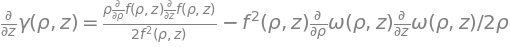

In [41]:
dgammadz = Eq(diff(gamma,z), expand( solve( ricciSimplified[3,1], diff(gamma,z) )[0] ) ) 
dgammadz

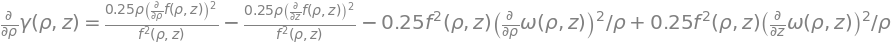

In [42]:
dgammadrho = Eq( diff(gamma,rho), expand( solve( einsteinSimplified[1,1], diff(gamma,rho) )[0] ) ) 
dgammadrho

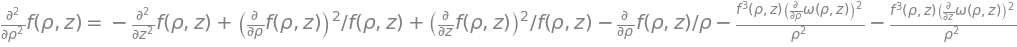

In [48]:
d2fdrho2 = Eq(diff(f,rho,rho), solve( ricciSimplified[0,0].args[2], diff(f,rho,rho) )[0] ) 
d2fdrho2 

In [50]:
vacuumFieldEquations = Matrix([d2fdrho2,d2omegadrho2,dgammadz,dgammadrho])
vacuumFieldEquations

⎡                                             2                2                            
⎢                                ⎛∂          ⎞    ⎛∂          ⎞    ∂              3       ⎛∂
⎢  2                2            ⎜──(f(ρ, z))⎟    ⎜──(f(ρ, z))⎟    ──(f(ρ, z))   f (ρ, z)⋅⎜─
⎢ ∂                ∂             ⎝∂ρ         ⎠    ⎝∂z         ⎠    ∂ρ                     ⎝∂
⎢───(f(ρ, z)) = - ───(f(ρ, z)) + ────────────── + ────────────── - ─────────── - ───────────
⎢  2                2               f(ρ, z)          f(ρ, z)            ρ                   
⎢∂ρ               ∂z                                                                        
⎢                                                                                           
⎢                                                 ∂           ∂               ∂           ∂ 
⎢                 2                2            2⋅──(f(ρ, z))⋅──(ω(ρ, z))   2⋅──(f(ρ, z))⋅──
⎢                ∂                ∂               ∂ρ          ∂ρ      